In [25]:
#Tổng hợp link
import requests
from bs4 import BeautifulSoup
import os
page = requests.get("https://practicepteonline.com/ielts-reading-tests/")
soup = BeautifulSoup(page.content, 'html.parser')
the_div = soup.find('div', class_='col-lg-8 col-md-8 col-sm-8 col-xs-12') #Lay doan code cua the div co class la col-lg-8 col-md-8 col-sm-8 col-xs-12 chứa các thẻ a
the_table = the_div.find('table') # Lấy thẻ table trong div ra
List_the_a = the_table.find_all('a')# Tìm hết thẻ a có trong the_table
Link_list=[]
for the_a in List_the_a:
  link = the_a.get('href')
  Link_list = Link_list + [link] # Chú ý cộng cho chuỗi ở trong dấu []


In [26]:
#Tổng hợp bài, từng bài lưu vào folder Text_list
import requests
a=0
for link in Link_list:
  text = ''
  page = requests.get(link)
  soup = BeautifulSoup(page.content, 'html.parser')
  the_div = soup.find('div', class_='col-lg-8 col-md-8 col-sm-8 col-xs-12')
  list_the_p = the_div.find_all('p')
  a = a+1
  for the_p in list_the_p:
    i = the_p.get_text()
    text = text + i + '\n'
    folder_path = '/Users/tranhoangnhat/Downloads/Ôn thi Cuối Kỳ/Khai Phá Web/Ôn tập TH KPW/iElts/Text_list'
  file_name = 'Text ' + str(a)
  file_path = os.path.join(folder_path, file_name)
  # Mở file và viết nội dung
  with open(file_path, 'w') as file:
      file.write(text)








In [27]:
# Code tiền xử lý dữ liệu, lưu vào file Data_Pre_Processing
text=''
import os
import nltk
import re
from underthesea import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from autocorrect import spell
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO
from nltk.probability import FreqDist

file_list = os.listdir("Text_list")
# Duyệt qua từng file txt
for file_name in file_list:
    # Mở file txt
    with open(os.path.join("Text_list", file_name), "r") as f:
      text = f.read()
    def converting_emojis(text):
        for x in EMOTICONS_EMO:
            text = text.replace(x, "_".join(EMOTICONS_EMO[x].replace(",","").replace(":","").split()))
        for x in UNICODE_EMOJI:
            text = text.replace(x, "_".join(UNICODE_EMOJI[x].replace(",","").replace(":","").split()))
        return text
    all_words= []
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'http\S+', '', text) # Remove html
    text = re.sub(r'[^\w\s]','',text) # Remove punctuation
    text = re.sub("\d+", " ", text) # Remove number
    text = converting_emojis(text) #Remove emoji
    text = re.sub(r"[!@#$[]()]'", "", text) # Remove character: !@#$[]()
    List_StopWords = set(stopwords.words('english'))
    text_pre = " ".join(text for text in text.split() if text not in List_StopWords)
    sentences = nltk.sent_tokenize(text_pre) # Sentence Tokenizing
    for sentence in sentences:
        words = nltk.word_tokenize(sentence) # Word Tokenizing
        all_words.extend(words)

    folder_path = '/Users/tranhoangnhat/Downloads/Ôn thi Cuối Kỳ/Khai Phá Web/Ôn tập TH KPW/iElts/Data_Pre_Processing'

    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'w', encoding='utf-8') as output_file:
        for word in all_words:
            output_file.write(word + '\n')



Tần suất từ xuất hiện trong văn bản:
[('c', 3313), ('b', 3256), ('people', 2746), ('questions', 2678), ('one', 2630), ('answer', 1949), ('information', 1858), ('given', 1817), ('many', 1795), ('also', 1749), ('passage', 1740), ('may', 1700), ('new', 1653), ('would', 1629), ('two', 1490), ('time', 1439), ('e', 1419), ('use', 1393), ('could', 1379), ('years', 1379), ('first', 1360), ('write', 1312), ('used', 1306), ('following', 1278), ('water', 1221), ('true', 1221), ('paragraph', 1220), ('reading', 1211), ('work', 1154), ('research', 1124), ('sheet', 1120), ('statement', 1120), ('even', 1114), ('world', 1112), ('boxes', 1111), ('choose', 1100), ('f', 1088), ('correct', 1073), ('way', 1061), ('however', 1013), ('says', 998), ('much', 985), ('different', 982), ('like', 937), ('make', 926), ('made', 897), ('g', 889), ('words', 863), ('often', 862), ('children', 861), ('false', 848), ('found', 841), ('writer', 832), ('human', 820), ('example', 807), ('number', 799), ('three', 776), ('less'

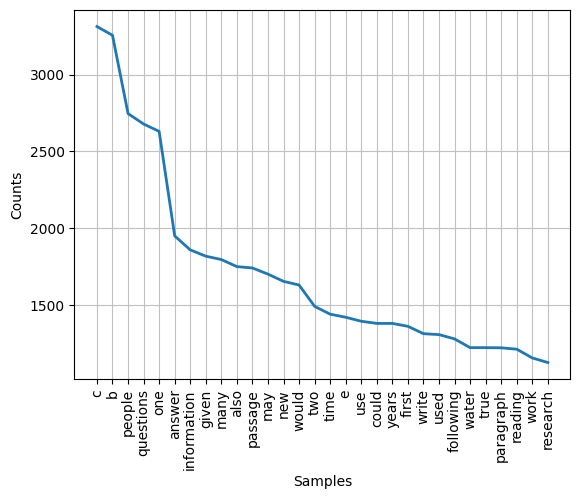

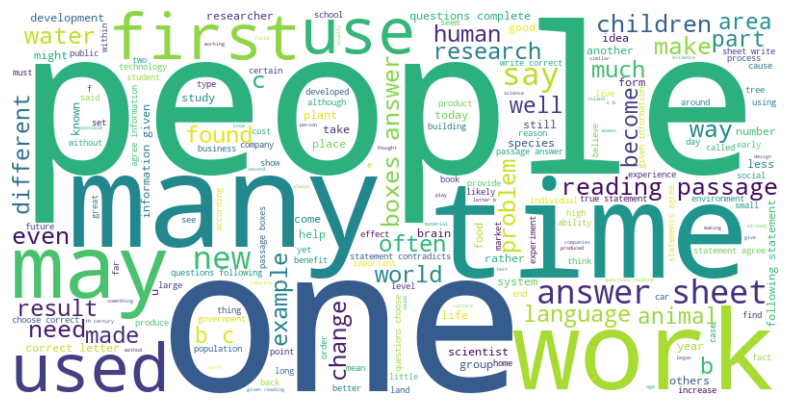

In [28]:

#Câu 2
import os
import nltk
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Lấy danh sách tất cả các file txt trong thư mục
file_list = os.listdir("Data_Pre_Processing")
text_pre_sum=''
i=0
# Duyệt qua từng file txt
for file_name in file_list:
    # Mở file txt
    with open(os.path.join("Data_Pre_Processing", file_name), "r") as f:
        # Đọc toàn bộ văn bản trong file
        text = f.read()
        text_pre_sum = text_pre_sum + text

words = nltk.word_tokenize(text_pre_sum)

# Tạo FreqDist để thống kê tần suất từ xuất hiện
freq_dist = FreqDist(words)

# In ra các từ và tần suất xuất hiện
print("Tần suất từ xuất hiện trong văn bản:")
print(freq_dist.most_common())

# Trực quan hóa bằng đồ thị
freq_dist.plot(30, cumulative=False)
plt.show()

# Tạo Word Cloud và trực quan hóa
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_pre_sum)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [12]:
#Câu 3a
from sklearn.feature_extraction.text import CountVectorizer

file_list = os.listdir("Data_Pre_Processing")
# Duyệt qua từng file txt
Data=[]
for file_name in file_list:
    # Mở file txt
    with open(os.path.join("Data_Pre_Processing", file_name), "r") as f:
      i = f.read()
      Data = Data + [i]
# Xay dung vector BOW
vect = CountVectorizer()
X = vect.fit_transform(Data)

# Xay dung tu dien
dictionary=list(vect.get_feature_names_out())

print("Words in dictionary: ", dictionary)
print("Vector Bag-of-Word: \n", X.toarray())

Words in dictionary:  ['________', '_________', '__________', '___________', '____________', '____________for', '____________is', '___________expect', '__________of', 'aa', 'aazpa', 'abab', 'aback', 'abandon', 'abandoned', 'abandonment', 'abbaabba', 'abbey', 'abbeys', 'abbreviations', 'abc', 'abel', 'abhaneri', 'abhor', 'abide', 'abietifolias', 'abietifolio', 'abilities', 'ability', 'abilitypeer', 'abject', 'ablation', 'able', 'abnormal', 'abnormally', 'aboard', 'abolished', 'abolition', 'aboriginal', 'aborigine', 'aborigines', 'aboriginesd', 'abound', 'abouta', 'aboveaverage', 'abram', 'abrasive', 'abreast', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absentee', 'absenteeism', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorber', 'absorbers', 'absorbing', 'absorbs', 'absorption', 'abstaining', 'abstract', 'abstracted', 'abstraction', 'abstractions', 'abstracts', 'absurd', 'absurdity', 'abubakr', 'abundance', 'abundancebased', 'abundances', 'abundant', 'abuse', 'abused'

In [13]:
#Câu 3b
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
# Lấy dữ liệu
file_list = os.listdir(r"Data_Pre_Processing")

# Đọc nội dung của từng tệp văn bản
for file_name in file_list:
  with open(os.path.join("Data_Pre_Processing", file_name),'r',encoding='utf-8') as f:
    Data = f.read()
    Data=word_tokenize(Data)
    # Khởi tạo đối tượng CountVectorizer
    # Tham số ngram_range=(1,2) cho biết chúng ta muốn sử dụng N-grams từ 1 đến 2.
    vectorizer = CountVectorizer(ngram_range=(1,2))
    # Biểu diễn vector đặc trưng cho các câu
    features = vectorizer.fit_transform(Data)


    # Mỗi hàng trong ma trận tương ứng với một câu và mỗi cột tương ứng với một N-gram trong tất cả các câu. Giá trị của mỗi phần tử trong ma trận là số lần xuất hiện của N-gram đó trong câu tương ứng.
    arr=features.toarray()

    print("Vocabulary N-gram:",file_name)

    print("1-gram",arr[0])
    print("2-gram",arr[1])
    print("-------------------")

Vocabulary N-gram: Text 54
1-gram [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
# Câu 3c
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

file_list = os.listdir(r"Data_Pre_Processing")

# Tạo danh sách các tài liệu
documents = []
for file_name in file_list:
  with open(os.path.join("Data_Pre_Processing", file_name), 'r', encoding='utf-8') as f:
    text = f.read()
    documents.append(text)

# Khởi tạo đối tượng TfidfVectorizer
vectorizer = TfidfVectorizer()

# Tính toán vectơ TF-IDF cho các tài liệu
tf_idf_vector = vectorizer.fit_transform(documents)

# Chuyển đổi vectơ TF-IDF sang dạng mảng
tf_idf_array = tf_idf_vector.toarray()

# Lấy tên các từ
features = vectorizer.get_feature_names_out()

# Tạo DataFrame từ vectơ TF-IDF
df_tf_idf = pd.DataFrame(tf_idf_array, columns=features)

# In ra DataFrame
print(df_tf_idf)

In [ ]:



#
import os
import nltk
import re
from underthesea import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from autocorrect import spell
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#

nltk.download('punkt')
nltk.download('stopwords')
!pip install emot
!pip install underthesea
!pip install autocorrect

!pip install nltk
!pip install matplotlib
!pip install scikit-learn




In [6]:
nltk.download('punkt')
nltk.download('stopwords')
!pip install emot
!pip install underthesea
!pip install autocorrect

!pip install nltk
!pip install matplotlib
!pip install scikit-learn



import nltk
import ssl

# Thiết lập SSL context để bỏ qua xác thực chứng chỉ
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

# Tải tài nguyên stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tranhoangnhat/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

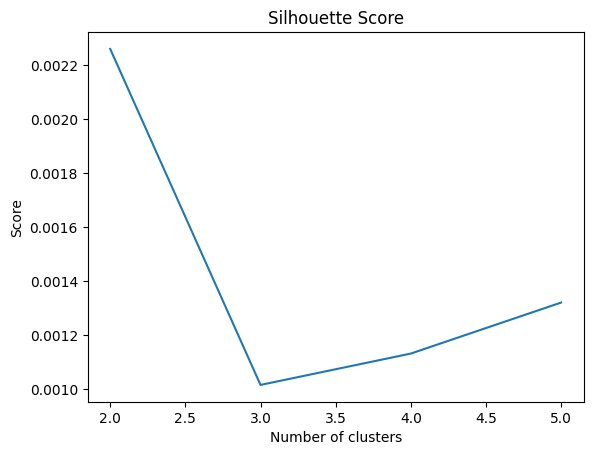

In [29]:
import os
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
file_list = os.listdir("Data_Pre_Processing")
list_text_pre_sum=[]
i=0
# Duyệt qua từng file txt
for file_name in file_list:
    # Mở file txt
    with open(os.path.join("Data_Pre_Processing", file_name), "r") as f:
        # Đọc toàn bộ văn bản trong file
        text = f.read()
        list_text_pre_sum = list_text_pre_sum + [text]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list_text_pre_sum)

# Find the optimal number of clusters using the Silhouette Score
silhouette_scores = []
k_max=6
for i in range(2, k_max):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
# Plot the Silhouette Scores
import matplotlib.pyplot as plt

plt.plot(range(2, k_max), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

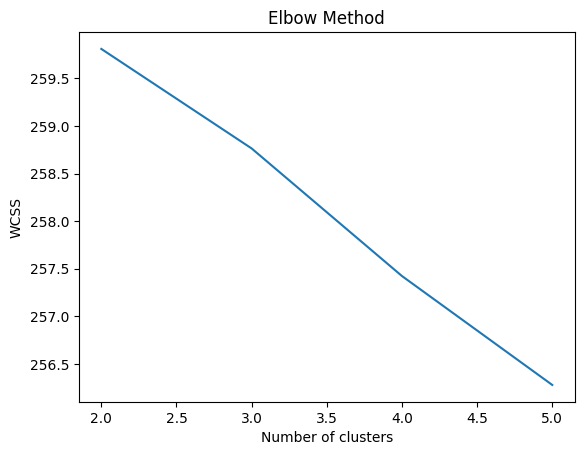

In [30]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import os
file_list = os.listdir("Data_Pre_Processing")
list_text_pre_sum=[]
i=0
# Duyệt qua từng file txt
for file_name in file_list:
    # Mở file txt
    with open(os.path.join("Data_Pre_Processing", file_name), "r") as f:
        # Đọc toàn bộ văn bản trong file
        text = f.read()
        list_text_pre_sum = list_text_pre_sum + [text]

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list_text_pre_sum)
# Find the optimal number of clusters using the elbow method
wcss = []
k_max=6
for i in range(2, k_max):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(2, k_max), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 

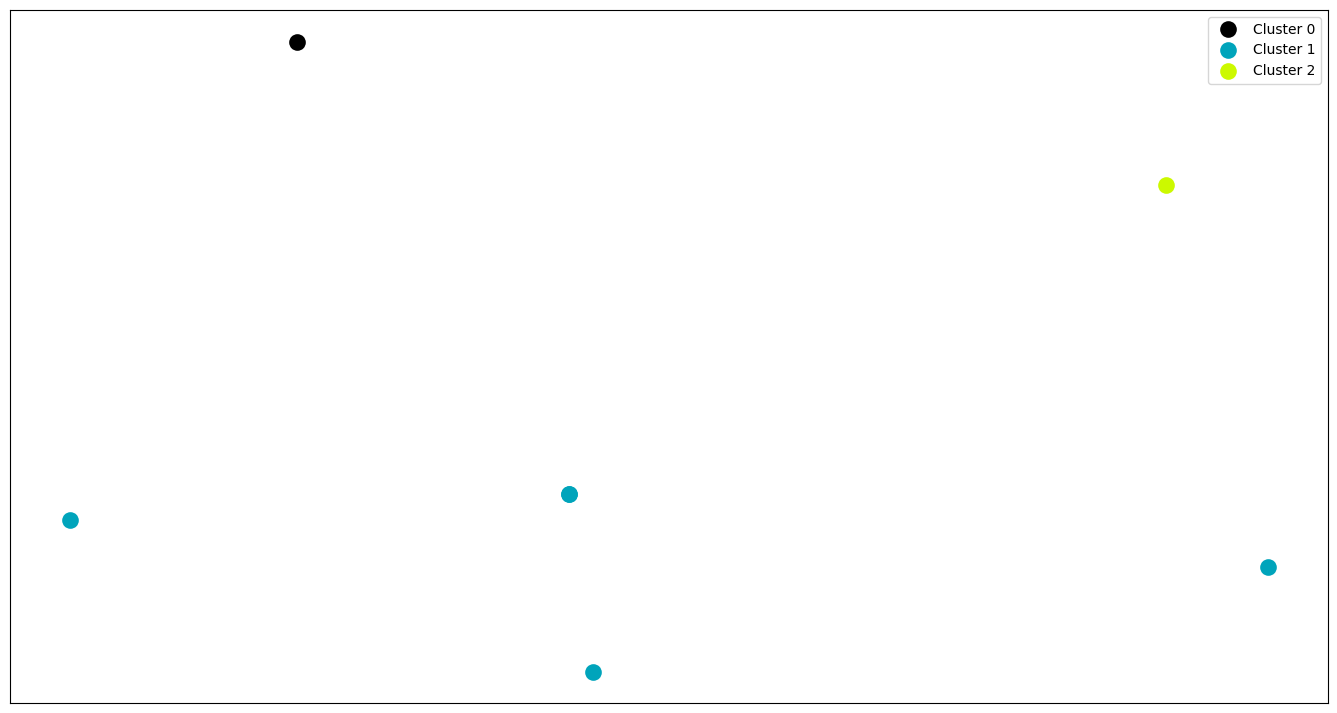

In [18]:
# Code vi du nen khong lien quan den du lieu cua phan nay
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk

# Ensure that the necessary NLTK packages are downloaded
# The text data provided
text_data = [
    "The quick brown fox jumps over the lazy dog.",
    "The quick brown fox jumps over the lazy dog.",
    "The quick brown fox jumps over the lazy dog and runs away.",
    "The lazy dog is not always quick to jump.",
    "The brown fox is quick and agile.",
    "The quick brown fox is a symbol of speed and cunning.",
    "The lazy dog is a symbol of relaxation and leisure."
]

# Tokenization and stemming (Cai nay khong can co vi lay du lieu tu cac file dax tien xu ly)
stemmer = SnowballStemmer("english")
def tokenize_and_stem(text):
    tokens = [word for word in word_tokenize(text) if len(word) > 1]
    stems = [stemmer.stem(t) for t in tokens]
    return stems

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words='english')
X = vectorizer.fit_transform(text_data)

# KMeans Clustering
num_clusters = 3
km = KMeans(n_clusters=num_clusters, n_init=3).fit(X)

# Multidimensional scaling
similarity_distance = 1 - cosine_similarity(X)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(similarity_distance)
xs, ys = pos[:, 0], pos[:, 1]

# Creating a DataFrame with the MDS results
clusters = km.labels_.tolist()
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
groups = df.groupby('label')

# Plotting
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

cluster_colors = {i: plt.cm.nipy_spectral(float(i) / num_clusters) for i in range(num_clusters)}
cluster_names = {i: f"Cluster {i}" for i in range(num_clusters)}

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, top=False, labelleft=False)

ax.legend(numpoints=1)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


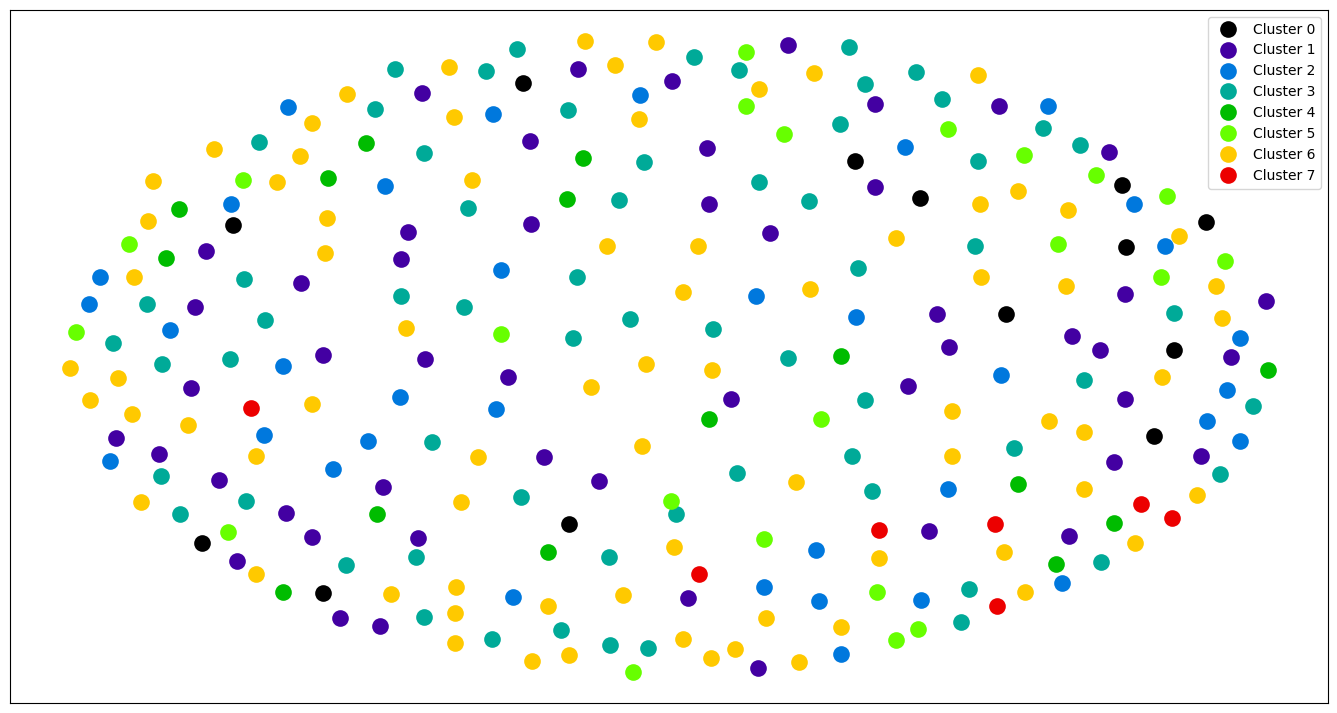

281


In [35]:
# Code vi du nen khong lien quan den du lieu cua phan nay
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk


# TF-IDF Vectorization
vectorizer = TfidfVectorizer( stop_words='english')
X = vectorizer.fit_transform(list_text_pre_sum)

# KMeans Clustering
num_clusters = 8
km = KMeans(n_clusters=num_clusters, n_init=3).fit(X)

# Multidimensional scaling
similarity_distance = 1 - cosine_similarity(X)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(similarity_distance)
xs, ys = pos[:, 0], pos[:, 1]

# Creating a DataFrame with the MDS results
clusters = km.labels_.tolist()
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
groups = df.groupby('label')

# Plotting
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

cluster_colors = {i: plt.cm.nipy_spectral(float(i) / num_clusters) for i in range(num_clusters)}
cluster_names = {i: f"Cluster {i}" for i in range(num_clusters)}

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, top=False, labelleft=False)

ax.legend(numpoints=1)
plt.show()
print(len(list_text_pre_sum))
